In [1]:
# import julia
# julia.install()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pyMAGEMINcalc as MM
import pyMELTScalc as M
#MM.__version__


import sys
#sys.path.append(r"//Users//gleesonm//Library//CloudStorage//GoogleDrive-gleesonm@berkeley.edu//My Drive//2022//GitHub//pyMELTScalc//MELTS")
sys.path.append(r'H:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

In [2]:
Results = M.AdiabaticDecompressionMelting(Model = "Holland", bulk = "KLB-1",
                                          Tp_C = 1500, P_start_bar = 56000, P_end_bar = 30000, dp_bar = 400)

(6.1, 2.9)

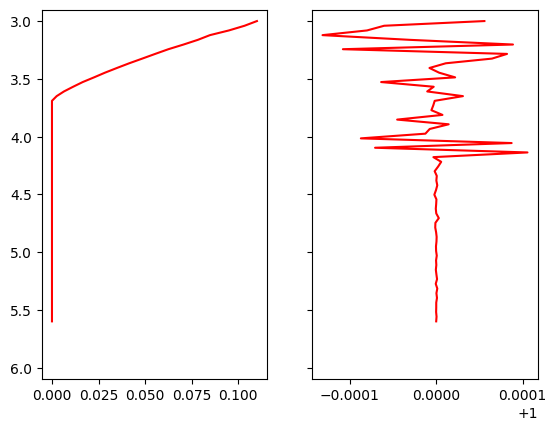

In [4]:
f, a = plt.subplots(1,2, sharey = True)
a[0].plot(Results['All']['mass_Liq'], Results['All']['P_bar']/10000, '-r')
a[1].plot(Results['All']['s']/Results['All']['s'].loc[0], Results['All']['P_bar']/10000, '-r')
a[0].set_ylim([6.1000,2.9000])

In [3]:
import os
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

In [5]:
Results = {'pMELTS': np.nan, 'Holland': np.nan, 'pyMelt': np.nan}

for r in Results:
    Results[r] = M.AdiabaticDecompressionMelting(Model = r, bulk = "KLB-1", Tp_C = 1400, Tp_Method = "pyMELT",
                                                 P_start_bar = 40000, P_end_bar = 16000, dp_bar = 400)

Text(0.5, 0, 'Temperature ($^o$C)')

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


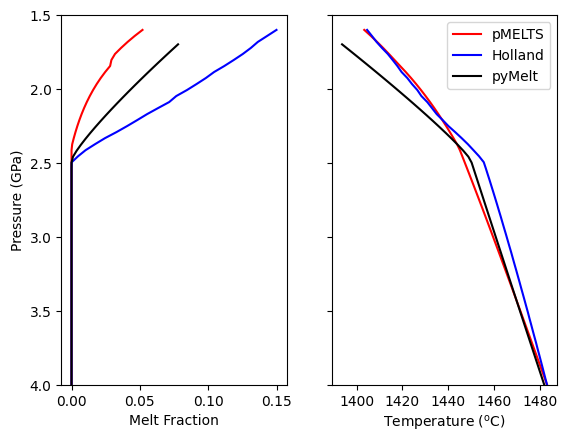

In [6]:
Color = {'pMELTS': 'r', 'Holland': 'b', 'pyMelt': 'k'}
f, a = plt.subplots(1,2, sharey=True)
for r in Results:
    a[0].plot(Results[r]['All']['mass_Liq'], Results[r]['All']['P_bar']/10000, '-', color = Color[r])
    a[1].plot(Results[r]['All']['T_C'], Results[r]['All']['P_bar']/10000, '-', color = Color[r], label = r)

a[0].set_ylim([4.0,1.5])
a[1].legend()

a[0].set_ylabel('Pressure (GPa)')
a[0].set_xlabel('Melt Fraction')
a[1].set_xlabel('Temperature ($^o$C)')

In [7]:
Results = M.AdiabaticDecompressionMelting(Model = r, comp_lith_1 = "KLB-1",
                                          comp_lith_2 = "KG1", comp_lith_3 = "hz", prop = [0.2, 0.6, 0.2],
                                          Tp_C = 1380, P_start_bar = 40000, P_end_bar = 2000, dp_bar = 500)

In [8]:
Results['All']

,T_C,P_bar,mass_Liq_tot,mass_Liq_KLB-1,mass_Liq_KG1,mass_Liq_hz
0,1458.168344,40698.382715,0.000000,0.000000,0.000000,0.0
1,1457.168783,40198.382715,0.000000,0.000000,0.000000,0.0
2,1456.169799,39698.382715,0.000000,0.000000,0.000000,0.0
3,1455.171392,39198.382715,0.000000,0.000000,0.000000,0.0
4,1454.173562,38698.382715,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...
71,1222.996642,5198.382715,0.335754,0.017420,0.553784,0.0
72,1218.089492,4698.382715,0.344194,0.021507,0.566488,0.0
73,1213.141069,4198.382715,0.352747,0.025824,0.579305,0.0
74,1208.151601,3698.382715,0.361414,0.030348,0.592241,0.0


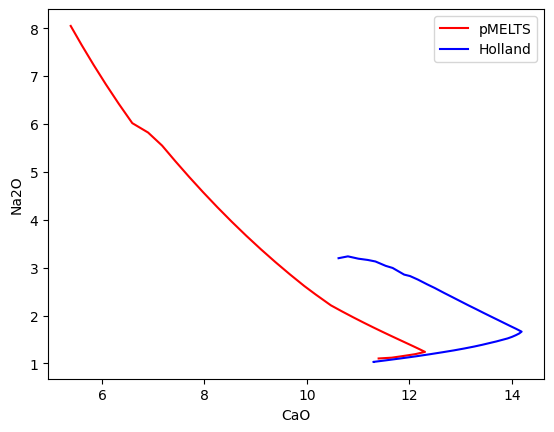

In [4]:
f, a = plt.subplots(1,1)
for r in Results:
    if r != "pyMelt":
        if r == 'Holland':
            a.plot(Results[r]['All']['CaO_Liq']*100, Results[r]['All']['Na2O_Liq']*100, '-', color = Color[r], label = r)
        else:
            a.plot(Results[r]['All']['CaO_Liq'], Results[r]['All']['Na2O_Liq'], '-', color = Color[r], label = r)
        
a.set_xlabel('CaO')
a.set_ylabel('Na2O')
a.legend()

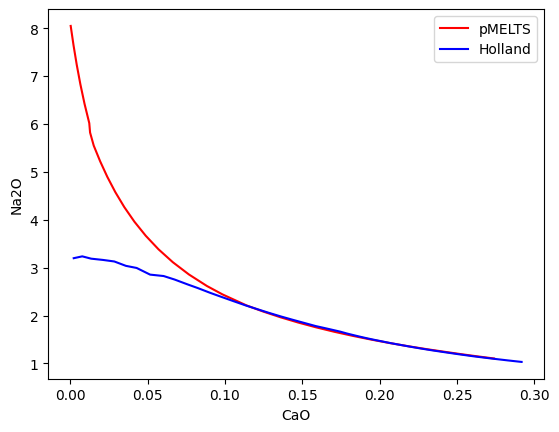

In [5]:
f, a = plt.subplots(1,1)
for r in Results:
    if r != "pyMelt":
        if r == 'Holland':
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['Na2O_Liq']*100, '-', color = Color[r], label = r)
        else:
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['Na2O_Liq'], '-', color = Color[r], label = r)
        
a.set_xlabel('CaO')
a.set_ylabel('Na2O')
a.legend()

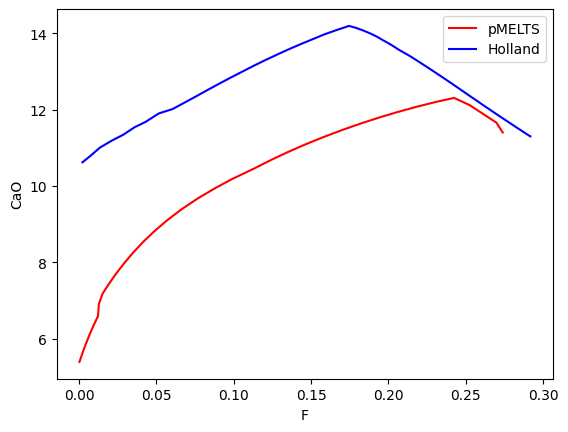

In [6]:
f, a = plt.subplots(1,1)
for r in Results:
    if r != "pyMelt":
        if r == 'Holland':
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['CaO_Liq']*100, '-', color = Color[r], label = r)
        else:
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['CaO_Liq'], '-', color = Color[r], label = r)
        
a.set_xlabel('F')
a.set_ylabel('CaO')
a.legend()

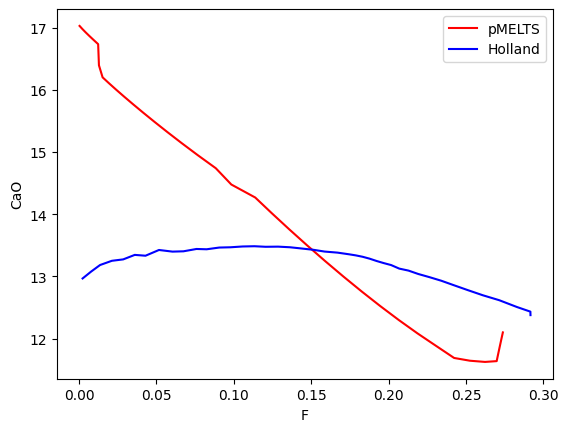

In [7]:
f, a = plt.subplots(1,1)
for r in Results:
    if r != "pyMelt":
        if r == 'Holland':
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['MgO_Liq']*100, '-', color = Color[r], label = r)
        else:
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['MgO_Liq'], '-', color = Color[r], label = r)
        
a.set_xlabel('F')
a.set_ylabel('CaO')
a.legend()

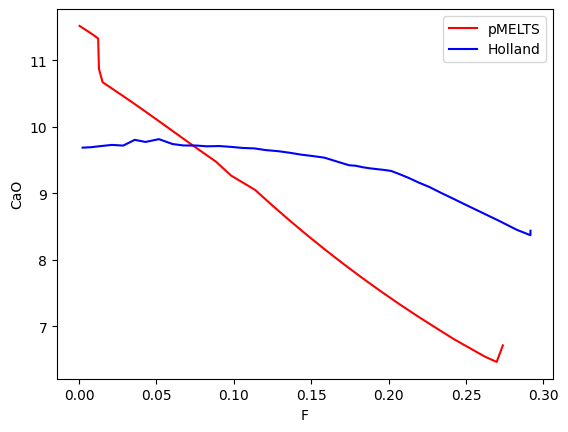

In [8]:
f, a = plt.subplots(1,1)
for r in Results:
    if r != "pyMelt":
        if r == 'Holland':
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['FeOt_Liq']*100, '-', color = Color[r], label = r)
        else:
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['FeOt_Liq'], '-', color = Color[r], label = r)
        
a.set_xlabel('F')
a.set_ylabel('CaO')
a.legend()

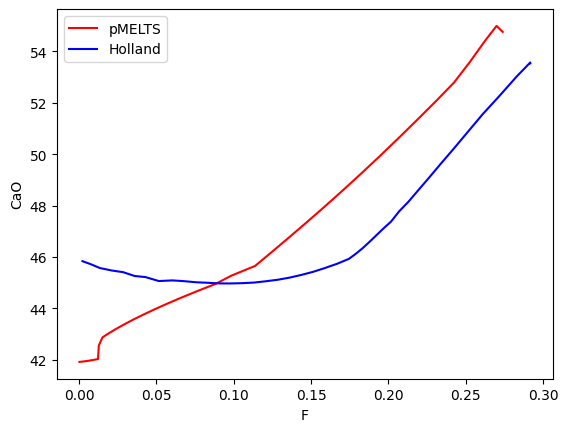

In [9]:
f, a = plt.subplots(1,1)
for r in Results:
    if r != "pyMelt":
        if r == 'Holland':
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['SiO2_Liq']*100, '-', color = Color[r], label = r)
        else:
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['SiO2_Liq'], '-', color = Color[r], label = r)
        
a.set_xlabel('F')
a.set_ylabel('CaO')
a.legend()

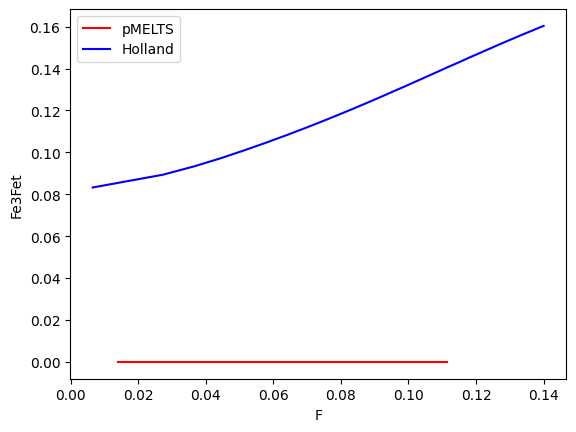

In [10]:
f, a = plt.subplots(1,1)
for r in Results:
    if r != "pyMelt":
        if r == 'Holland':
            a.plot(Results[r]['All']['mass_Grt'], Results[r]['All']['Fe3Fet_Grt'], '-', color = Color[r], label = r)
        else:
            a.plot(Results[r]['All']['mass_Grt'], Results[r]['All']['Fe3Fet_Grt'], '-', color = Color[r], label = r)
        
a.set_xlabel('F')
a.set_ylabel('Fe3Fet')
a.legend()

Text(0.5, 0, 'Sp Proportion')

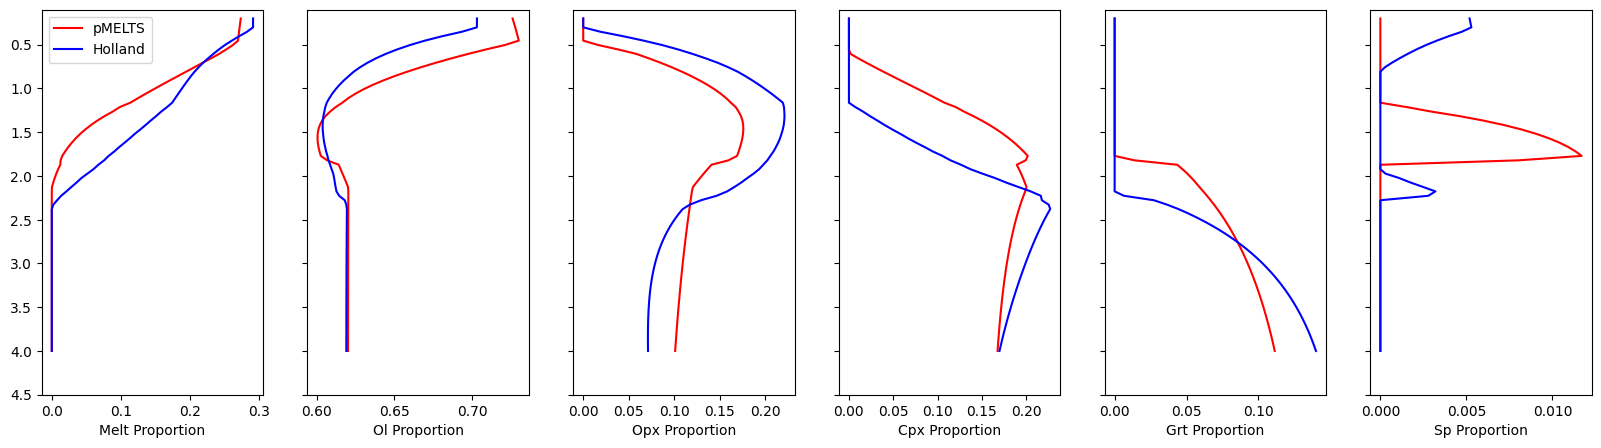

In [11]:
f, a = plt.subplots(1,6, figsize = (20,5), sharey = True)
a[0].set_ylim([4.5, 0.1])
for r in Results:
    if r != 'pyMelt':
        if 'mass_Liq' in Results[r]['All'].keys():
            a[0].plot(Results[r]['All']['mass_Liq'],
                      Results[r]['All']['P_bar']/10000, '-', color = Color[r], label = r)
        if 'mass_Ol' in Results[r]['All'].keys():
            a[1].plot(Results[r]['All']['mass_Ol'],
                      Results[r]['All']['P_bar']/10000, '-', color = Color[r])
        if 'mass_Opx' in Results[r]['All'].keys():
            a[2].plot(Results[r]['All']['mass_Opx'],
                      Results[r]['All']['P_bar']/10000, '-', color = Color[r])
        if 'mass_Cpx' in Results[r]['All'].keys():
            a[3].plot(Results[r]['All']['mass_Cpx'],
                      Results[r]['All']['P_bar']/10000, '-', color = Color[r])
        if 'mass_Grt' in Results[r]['All'].keys():
            a[4].plot(Results[r]['All']['mass_Grt'],
                      Results[r]['All']['P_bar']/10000, '-', color = Color[r])
        if 'mass_Sp' in Results[r]['All'].keys():
            a[5].plot(Results[r]['All']['mass_Sp'],
                      Results[r]['All']['P_bar']/10000, '-', color = Color[r])
            
a[0].legend()
a[0].set_xlabel('Melt Proportion')
a[1].set_xlabel('Ol Proportion')
a[2].set_xlabel('Opx Proportion')
a[3].set_xlabel('Cpx Proportion')
a[4].set_xlabel('Grt Proportion')
a[5].set_xlabel('Sp Proportion')

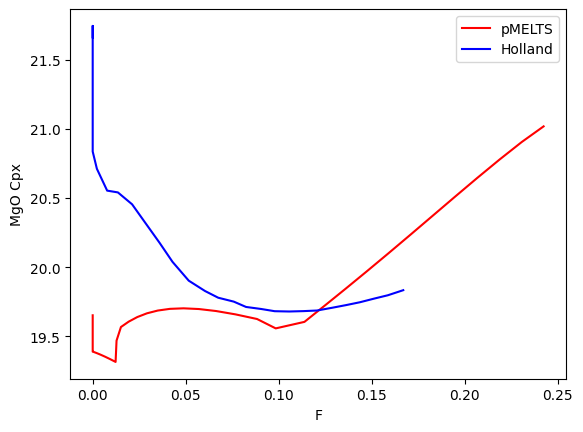

In [20]:
f, a = plt.subplots(1,1)
for r in Results:
    if r != "pyMelt":
        if r == 'Holland':
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['MgO_Cpx']*100, '-', color = Color[r], label = r)
        else:
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['MgO_Cpx'], '-', color = Color[r], label = r)
        
a.set_xlabel('F')
a.set_ylabel('MgO Cpx')
a.legend()

In [ ]:
f, a = plt.subplots(1,1)
for r in Results:
    if r != "pyMelt":
        if r == 'Holland':
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['TiO2_Liq']*100, '-', color = Color[r], label = r)
        else:
            a.plot(Results[r]['All']['mass_Liq'], Results[r]['All']['TiO2_Liq'], '-', color = Color[r], label = r)
        
a.set_xlabel('F')
a.set_ylabel('CaO')
a.legend()

In [6]:
Results['pMELTS']['All']

,T_C,P_bar,h,s,v,dvdp,logfO2,SiO2_Ol,TiO2_Ol,Al2O3_Ol,...,Na2O_Sp,K2O_Sp,P2O5_Sp,H2O_Sp,CO2_Sp,Fe3Fet_Sp,h_Sp,mass_Sp,v_Sp,rho_Sp
0,1462.127612,40000.000000,-1.159745e+06,258.391035,30.502487,0.001494,-2.808888,40.957811,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1460.969742,39493.333333,-1.161290e+06,258.391035,30.513032,0.001493,-2.843701,40.957538,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1459.810777,38986.666667,-1.162837e+06,258.391035,30.523654,0.001493,-2.878863,40.957254,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1458.650637,38480.000000,-1.164384e+06,258.391035,30.534355,0.001493,-2.914382,40.956960,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1457.489236,37973.333333,-1.165931e+06,258.391035,30.545138,0.001492,-2.950270,40.956655,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1290.649170,4026.666667,-1.272116e+06,258.391035,33.096815,0.001062,-4.606941,41.078702,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
72,1289.281854,3520.000000,-1.273794e+06,258.391035,33.130184,0.001060,-4.691356,41.080773,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
73,1287.905625,3013.333333,-1.275473e+06,258.391035,33.164100,0.001057,-4.776870,41.082958,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
74,1286.520220,2506.666667,-1.277154e+06,258.391035,33.198587,0.001054,-4.863491,41.085263,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [2]:
comp = {'SiO2_Liq': 44.48,
        'TiO2_Liq': 0.16,
        'Al2O3_Liq': 3.59,
        'FeOt_Liq': 8.10,
        'MgO_Liq': 39.22,
        'CaO_Liq': 3.44,
        'Na2O_Liq': 0.30,
        'Fe3Fet_Liq': 0.085}

In [3]:
comp = M.comp_fix(Model = "pMELTS", comp = comp)
comp

{'SiO2_Liq': 44.48,
 'TiO2_Liq': 0.16,
 'Al2O3_Liq': 3.59,
 'FeOt_Liq': 8.1,
 'MgO_Liq': 39.22,
 'CaO_Liq': 3.44,
 'Na2O_Liq': 0.3,
 'Fe3Fet_Liq': 0.085,
 'MnO_Liq': 0.0,
 'K2O_Liq': 0.0,
 'P2O5_Liq': 0.0,
 'H2O_Liq': 0.0,
 'CO2_Liq': 0.0}

In [4]:
Results = M.AdiabaticDecompressionMelting_MELTS(Model = "pMELTS", comp = comp, 
                                                Tp_C=1300, P_start_bar=35000, P_end_bar = 10000, dp_bar = 200)

Setting calculation mode to pMELTS


In [5]:
Results

{'Conditions':      temperature      pressure             h           s          v      dvdp   
 0    1368.175622  35000.000000 -1.185646e+06  252.075889  30.470395  0.001451  \
 1    1367.747868  34798.387097 -1.186261e+06  252.075889  30.474848  0.001451   
 2    1367.319901  34596.774194 -1.186875e+06  252.075889  30.479314  0.001450   
 3    1366.891713  34395.161290 -1.187490e+06  252.075889  30.483796  0.001450   
 4    1366.463301  34193.548387 -1.188104e+06  252.075889  30.488292  0.001450   
 ..           ...           ...           ...         ...        ...       ...   
 120  1304.640969  10806.451613 -1.260197e+06  252.075889  31.317075  0.001408   
 121  1303.259546  10604.838710 -1.260829e+06  252.075889  31.337462  0.001404   
 122  1301.817089  10403.225806 -1.261461e+06  252.075889  31.359045  0.001399   
 123  1300.309433  10201.612903 -1.262093e+06  252.075889  31.381925  0.001394   
 124  1298.732331  10000.000000 -1.262726e+06  252.075889  31.406212  0.001388   
 


In [21]:
# comp = {'SiO2_Liq': 44.48,
#         'TiO2_Liq': 0.16,
#         'Al2O3_Liq': 3.59,
#         'FeOt_Liq': 8.10,
#         'MgO_Liq': 39.22,
#         'CaO_Liq': 3.44,
#         'Na2O_Liq': 0.30,
#         'K2O_Liq': 0.02,
#         'Cr2O3_Liq': 0.42,
#         'H2O_Liq': 0.00,
#         'Fe3Fet_Liq': 0.085}

comp = {'SiO2_Liq': 47.0,
        'TiO2_Liq': 0.78,
        'Al2O3_Liq': 9.75,
        'FeOt_Liq': 9.77,
        'MgO_Liq': 23.6,
        'CaO_Liq': 7.35,
        'Na2O_Liq': 1.52,
        'K2O_Liq': 0.12,
        'Cr2O3_Liq': 0.20,
        'H2O_Liq': 0.0,
        'Fe3Fet_Liq': 0.155}

In [22]:
comp['Fe3Fet_Liq']*(((159.59/2)/71.844)*comp['FeOt_Liq'] - comp['FeOt_Liq'])

0.16759363134012617

In [4]:
Results = MM.AdiabaticDecompressionMelting(comp = comp, 
                                           T_p_C = 1500.0, 
                                           P_start_kbar = 55.0, 
                                           P_end_kbar = 30.0, 
                                           dp_kbar = 0.2,
                                           Frac = 0)

In [5]:
for i in Results:
    if "_prop" not in i:
        if i != "sys" and i != "Conditions":
            Tot = Results[i].sum(axis = 1)
            for el in Results[i]:
                Results[i][el] = 100*Results[i][el]/Tot

In [6]:
for i in Results:
    if "_prop" not in i:
        if i != "sys" and i != "Conditions":
            for el in Results[i]:
                Results[i]['Fe3Fet'] = Results[i]['O']/(((159.9/2)/71.844)*Results[i]['FeO'] -
                                                        Results[i]['FeO'])

In [7]:
Results["Mass"] = pd.DataFrame()
for i in Results:
    if "_prop" in i:
        Results['Mass'][i[:-5]] = Results[i]['Mass']

In [8]:
import FeIsotopeCalc as dfe

In [9]:
delta56Fe_offset = dfe.calc_56Fe54Fe_all_phases(Results["Conditions"], 
                                                   Results["Mass"], 
                                                   Results)

h:\my drive\2022\github\feisotopecalc\src\FeIsotopeCalc\main.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frac[s][np.where(np.isnan(Frac[s]))] = 0
h:\my drive\2022\github\feisotopecalc\src\FeIsotopeCalc\main.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frac[s][np.where(np.isnan(Frac[s]))] = 0
h:\my drive\2022\github\feisotopecalc\src\FeIsotopeCalc\main.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frac[s][np.wher

In [10]:
delta56Fe_offset

,g,cpx,liq,ol
0,-0.016955,0.046222,NaN,-0.014950
1,-0.016983,0.046195,NaN,-0.014971
2,-0.017010,0.046167,NaN,-0.014993
3,-0.017039,0.046139,NaN,-0.015016
4,-0.017067,0.046110,NaN,-0.015038
...,...,...,...,...
120,-0.031959,0.024459,0.016241,-0.030265
121,-0.032227,0.024022,0.016226,-0.030517
122,-0.032503,0.023615,0.016223,-0.030768
123,-0.032784,0.023189,0.016207,-0.031011


In [11]:
Results.keys()

dict_keys(['g_prop', 'g', 'cpx', 'liq', 'Conditions', 'ol', 'sys', 'cpx_prop', 'liq_prop', 'ol_prop', 'Mass'])

In [19]:
Results["g"].to_clipboard(excel = True)

In [15]:
delta56Fe_offset.to_clipboard(excel = True)

Text(0, 0.5, 'Pressure (GPa)')

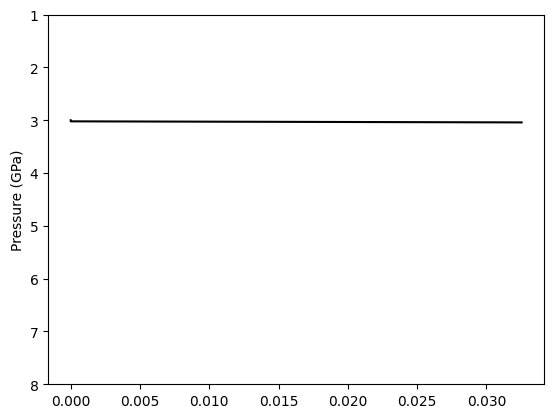

In [12]:
f, a = plt.subplots(1,1)
a.plot(delta56Fe_offset['liq'], Results['Conditions']['P_kbar']/10, '-k')
a.set_ylim([8, 1])
a.set_ylabel('Pressure (GPa)')

In [13]:
Results['Mass']

,ol,g,opx,cpx,liq
0,0.619120,0.152911,0.062095,0.165848,0.000000
1,0.619120,0.152762,0.061797,0.166295,0.000000
2,0.619119,0.152611,0.061498,0.166746,0.000000
3,0.619119,0.152457,0.061197,0.167201,0.000000
4,0.619119,0.152301,0.060894,0.167661,0.000000
...,...,...,...,...,...
120,0.619297,0.085062,0.043599,0.252022,0.000000
121,0.619305,0.083496,0.044241,0.252941,0.000000
122,0.618860,0.081486,0.047265,0.250810,0.001550
123,0.000000,0.000000,0.000000,0.000000,0.999944


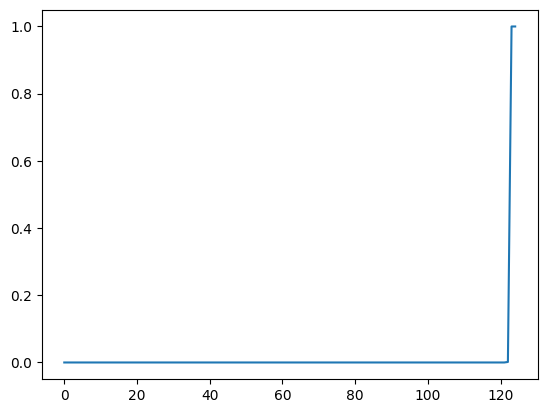

In [14]:
f, a = plt.subplots(1,1)
a.plot(Results["liq_prop"]["Mass"])

In [55]:
Results

{'g_prop':          Mass
 0    0.354519
 1    0.354274
 2    0.354022
 3    0.353754
 4    0.353488
 ..        ...
 120  0.196189
 121  0.193232
 122  0.190457
 123  0.187414
 124  0.184608
 
 [125 rows x 1 columns],
 'g':           SiO2      Al2O3       CaO        MgO        FeO  K2O  Na2O   
 0    41.680488  21.492329  6.911867  18.146190  10.171958  0.0   0.0  \
 1    41.681449  21.495619  6.911666  18.147914  10.168242  0.0   0.0   
 2    41.682261  21.498916  6.911329  18.149102  10.165416  0.0   0.0   
 3    41.683744  21.502270  6.911491  18.152682  10.158684  0.0   0.0   
 4    41.684585  21.505612  6.911088  18.153976  10.155761  0.0   0.0   
 ..         ...        ...       ...        ...        ...  ...   ...   
 120  42.101706  22.193082  5.814806  19.735096   8.816426  0.0   0.0   
 121  42.105884  22.198861  5.808410  19.749936   8.797680  0.0   0.0   
 122  42.108839  22.204348  5.802841  19.759916   8.785131  0.0   0.0   
 123  42.112644  22.209813  5.796567  19.773459 

In [11]:
import julia
julia.install()

[ Info: Julia version info


Julia Version 1.9.3
Commit bed2cd540a1 (2023-08-24 14:43 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  uname: Darwin 22.5.0 Darwin Kernel Version 22.5.0: Mon Apr 24 20:52:43 PDT 2023; root:xnu-8796.121.2~5/RELEASE_ARM64_T8112 arm64 arm
  CPU: Apple M2: 
              speed         user         nice          sys         idle          irq
       #1  2400 MHz      22490 s          0 s      11341 s      65056 s          0 s
       #2  2400 MHz      22201 s          0 s      10506 s      66219 s          0 s
       #3  2400 MHz      21120 s          0 s       9663 s      68202 s          0 s
       #4  2400 MHz      20351 s          0 s       9066 s      69619 s          0 s
       #5  2400 MHz       6946 s          0 s       2923 s      89288 s          0 s
       #6  2400 MHz       4107 s          0 s       1275 s      93796 s          0 s
       #7  2400 MHz       3004 s          0 s        712 s      95487 s          0

[ Info: Julia executable: /Applications/Julia-1.9.app/Contents/Resources/julia/bin/julia
[ Info: Trying to import PyCall...
┌ Warning: PyCall is already installed.  However, you may have trouble using
│ this Python executable because it is statically linked to libpython.
│ 
│ For more information, see:
│     https://pyjulia.readthedocs.io/en/latest/troubleshooting.html
│ 
│ Python executable:
│     /Users/gleesonm/anaconda3/bin/python
│ Julia executable:
│     /Applications/Julia-1.9.app/Contents/Resources/julia/bin/julia
└ @ Main ~/anaconda3/lib/python3.11/site-packages/julia/install.jl:90


Text(0, 0.5, 'Pressure (GPa)')

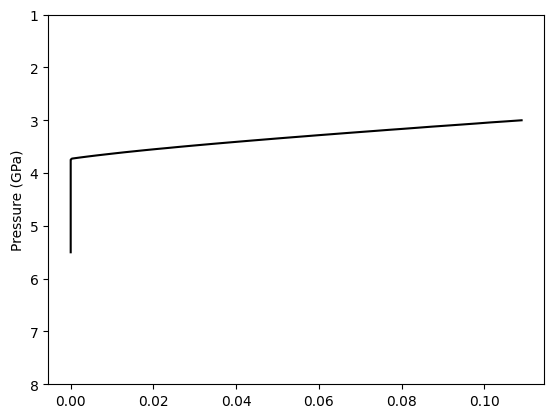

In [41]:
f, a = plt.subplots(1,1)
a.plot(Results['liq_prop']['Mass'], Results['Conditions']['P_kbar']/10, '-k')
a.set_ylim([8, 1])
a.set_ylabel('Pressure (GPa)')

Text(0, 0.5, 'Pressure (GPa)')

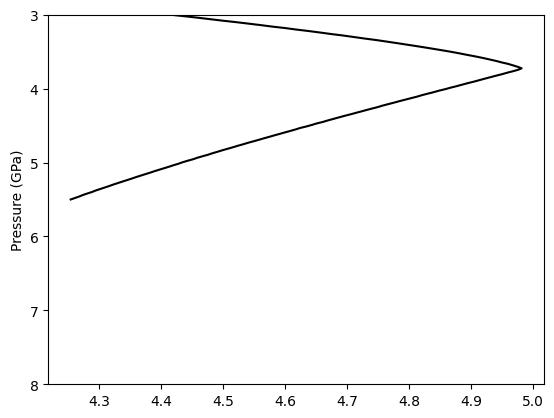

In [42]:
f, a = plt.subplots(1,1)
a.plot(Results['cpx']['FeO'], Results['Conditions']['P_kbar']/10, '-k')
a.set_ylim([8, 3])
a.set_ylabel('Pressure (GPa)')

In [17]:
Results['cpx']['FeO']

0      0.035510
1      0.035555
2      0.035605
3      0.035651
4      0.035697
         ...   
245    0.000000
246    0.000000
247    0.000000
248    0.000000
249    0.000000
Name: FeO, Length: 250, dtype: float64

KeyError: 'Entropy'

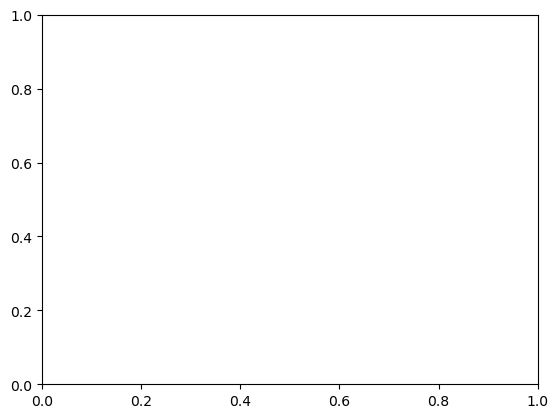

In [11]:
f, a = plt.subplots(1,1)
a.plot(Results['Conditions']['Entropy'], Results['Conditions']['pressure']/10000, '-k')
a.set_ylim([4, 0])
a.set_ylabel('Pressure (GPa)')